In [1]:
%matplotlib notebook

In [2]:
from mandelbrot import calculate_mandelbrot_set
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class MB:
    def __init__(self):
        self.x_min = -2
        self.x_max = 0.5
        self.y_min = -1.25
        self.y_max = 1.25
        self.side = 1000
        self.n_iter = 100
        
        self.x_span = np.abs(self.x_max - self.x_min)
        self.y_span = np.abs(self.y_max - self.y_min)
        
        self.mb = self.get_mandelbrot()
    
    def map_value(self, x, in_min, in_max, out_min, out_max):
        return (x-in_min) * (out_max-out_min) / (in_max-in_min) + out_min
    
    def get_mandelbrot(self):
        return calculate_mandelbrot_set(self.x_min, self.x_max,
                                           self.y_min, self.y_max,
                                           self.side, self.side, self.n_iter)
    def zoom_in(self, x, y):
        self.x_span = np.abs(self.x_max - self.x_min) * 0.5
        self.y_span = np.abs(self.y_max - self.y_min) * 0.5
        self.x_min = x - self.x_span / 2
        self.x_max = x + self.x_span / 2
        self.y_min = y - self.y_span / 2
        self.y_max = y + self.y_span / 2
        self.mb = self.get_mandelbrot()
        
    def zoom_out(self):
        self.x_span = np.abs(self.x_max - self.x_min) * 1.5
        self.y_span = np.abs(self.y_max - self.y_min) * 1.5
        self.x_min = self.map_value(self.x_min, self.x_min, self.x_max, 
                                    self.x_min - self.x_span/2, self.x_max + self.x_span/2)
        self.x_max = self.map_value(self.x_max, self.x_min, self.x_max, 
                                    self.x_min - self.x_span/2, self.x_max + self.x_span/2)
        self.y_min = self.map_value(self.y_min, self.y_min, self.y_max, 
                                    self.y_min - self.y_span/2, self.y_max + self.y_span/2)
        self.y_max = self.map_value(self.y_max, self.y_min, self.y_max, 
                                    self.y_min - self.y_span/2, self.y_max + self.y_span/2)
        self.mb = self.get_mandelbrot()

In [4]:
mb = MB()

<IPython.core.display.Javascript object>


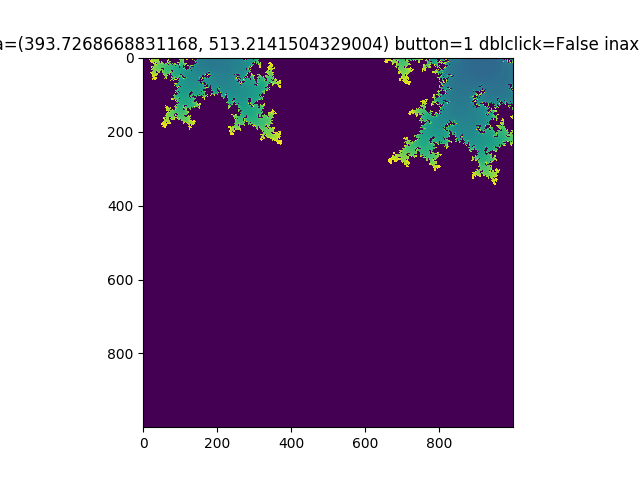

7

In [12]:
fig, ax = plt.subplots()
im = ax.imshow(mb.mb)

def handle_mouse_press(event):
    ax.set_title(str(event))
    if event.button == 1:
        x = mb.map_value(event.xdata, 0, 1000, mb.x_min, mb.x_max)
        y = mb.map_value(event.ydata, 0, 1000, mb.y_min, mb.y_max)
        
        mb.zoom_in(x, y)
        im.set_data(mb.mb)
        im.autoscale()
        plt.draw()
    elif event.button == 3:   
        mb.zoom_out()
        im.set_data(mb.mb)
        im.autoscale()
        plt.draw()

        
fig.canvas.mpl_connect("button_press_event", handle_mouse_press)


In [6]:
plt.imshow(mb.mb);
plt.show()